<a href="https://colab.research.google.com/github/rajeshvalluri/TensorFlow/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("This is the first colab work done by Rajesh Valluri")

This is the first colab work done by Rajesh Valluri


In [0]:
pip install -U tensorflow_datasets

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  #Using tensorflow_version magic  . No idea what this means but just using it for now based on instructions in the course
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf


TensorFlow 2.x selected.


In [0]:
#import tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar() # so we do not have to look at the download progressbar

#Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#enable logging and set parameters
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset, test_dataset = dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete56L5R4/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete56L5R4/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
num_train_examples = metadata.splits['train'].num_examples 
num_test_examples = metadata.splits['test'].num_examples 
print("The number of training examples is",num_train_examples)
print("The number of testing examples is",num_test_examples)

The number of training examples is 60000
The number of testing examples is 10000


In [0]:
#Data preprocessing
#Create a function for normalization
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels # labels are unchanged basically. they are counted from 0 to 9, a total of 10 labels
#The map function applies the normalization function to every image with one line of code. How fucking awesome is that!!
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
#Load these images into memory so that they can be accessed easily
train_dataset = train_dataset.cache() #one line of fucking code!!
test_dataset = test_dataset.cache()


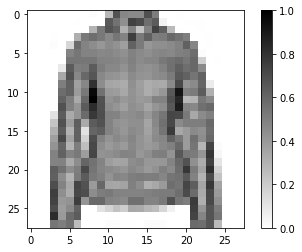

In [0]:
#Explore the data just processed and cached
#pick an image and remove the color information
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28)) # taking the single vector and turning it into a 28 by 28 matrix

#we can plot the image above using matplotlib
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


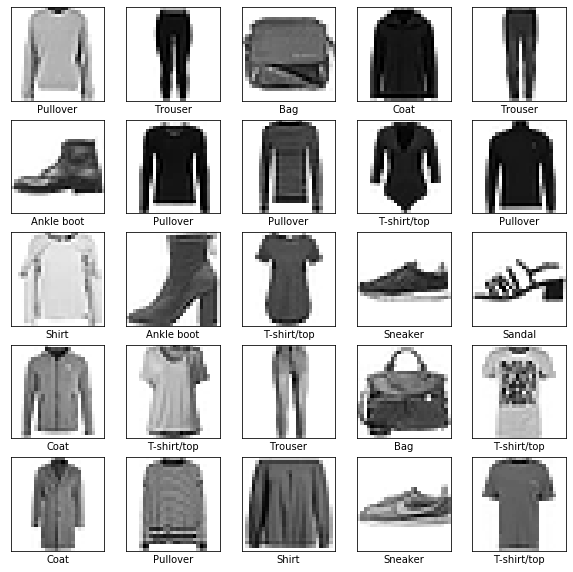

In [0]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in train_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

In [0]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])                  

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
#batch size is the number of images it uses per each update of the parameters
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE) #this step has an effect on the "Take" function. It will now take the "batch size" number of images


In [0]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4938 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3062 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8904


In [0]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 3s 9ms/step - loss: 0.3956 - accuracy: 0.8622


In [0]:
print("Accuracy on the test set is",test_accuracy)

Accuracy on the test set is 0.8622


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
predictions.shape

(32, 10)

In [0]:
predictions[0]

array([ -2.6711004,  -5.260289 ,   3.15471  ,  -6.6348963,   6.1483335,
       -13.430356 ,   3.9536338, -13.256599 ,  -6.546773 , -10.946812 ],
      dtype=float32)

In [0]:
np.argmax(predictions[0])

4

In [0]:
class_names[4]
test_labels[0]

4

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

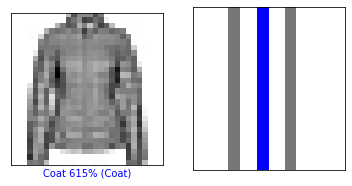

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

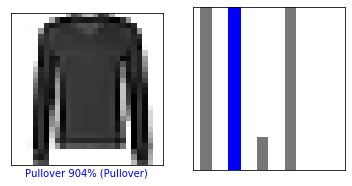

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

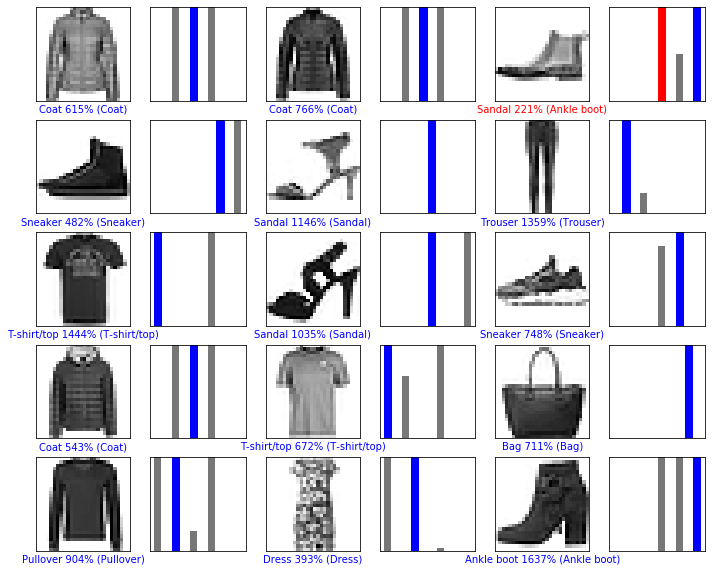

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [0]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [0]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[ -2.6711001  -5.260292    3.1547103  -6.634897    6.1483335 -13.430356
    3.9536343 -13.256599   -6.546773  -10.946812 ]]


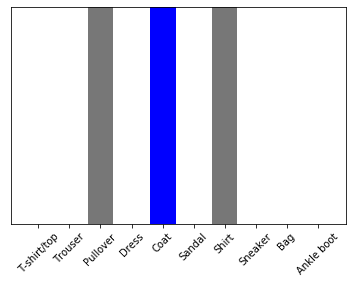

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

4